In [ ]:
# keywords

# matplotlib, mpl_toolkits.mplot3d, Axes3D, LinearRegression, DecisionTreeClassifier, export_text, KMeans
# scatter, KMeans.cluster_centers_, LinearRegression.coef_, LinearRegression.intercept_

In [1]:
### Тут нужно сделать импорты всех необходимых библиотек ###

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.cluster import KMeans
matplotlib.rc("font", size=12)

In [3]:
### Здесь требуется загрузить датасет phones.csv ###

In [4]:
start_df = pd.read_csv('phones.csv')
start_df.head()

,disk,os,price,year
0,64,Android,7256,2016
1,128,Android,7623,2015
2,64,Android,1916,2010
3,512,iOS,15045,2017
4,16,Android,4478,2013


In [5]:
### Опицонально: используя matplotlib, можно сделать визуализацию загруженного датасета ###

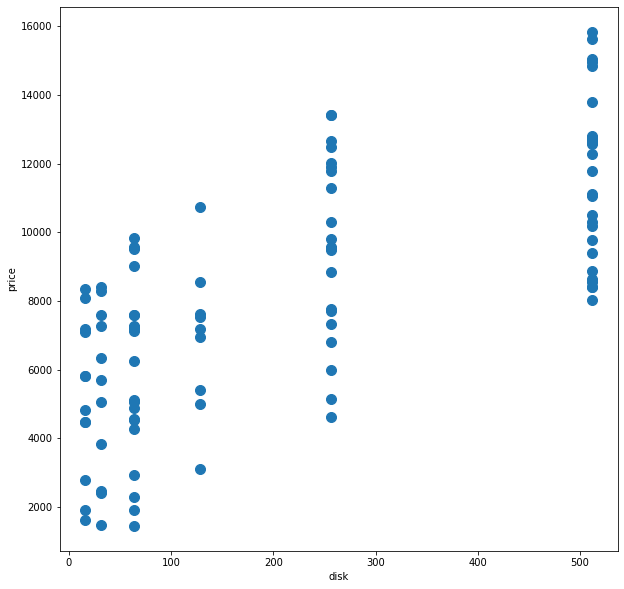

In [6]:
# двухмерный:  disk x price

fig = plt.figure(figsize=(10, 10))
ax = plt.axes()
ax.scatter(start_df["disk"], start_df["price"], s=100)
ax.set_xlabel("disk")
ax.set_ylabel("price")
plt.show()

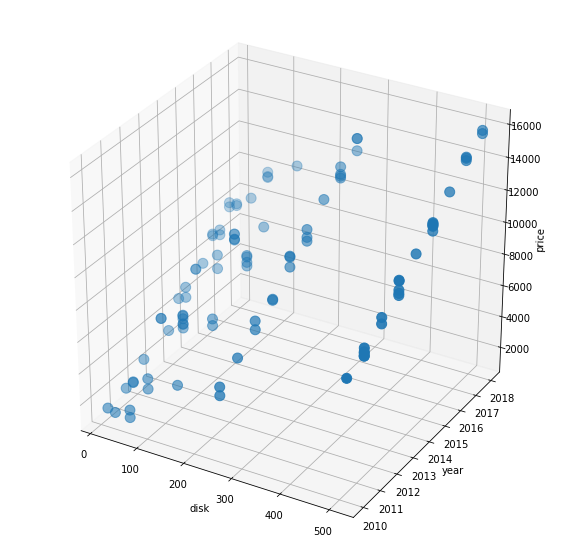

In [7]:
# трехмерный: disk x year x price

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection="3d")

# помещаем точки на график
ax.scatter(start_df["disk"], start_df["year"], start_df["price"], s=100)

# называем оси
ax.set_xlabel("disk")
ax.set_ylabel("year")
ax.set_zlabel("price")

# отображаем картинку
plt.show()

Задание 1: обучить модель регрессии

In [8]:
### Тут нужно выгрузить в соответствующие переменные выбранные признаки ###
# X = 
# y =

X = start_df[['disk']]
y = start_df['price']

In [9]:
### Здесть следует запустить процесс обучения ###
### и продемонстрировать работосопосбность обученной модели ###

In [10]:
reg = LinearRegression().fit(X, y)
reg.predict(X[0:1])[0]

6120.265447090668

In [11]:
[b] = reg.coef_
a = reg.intercept_
def reg_prediction(disk):
    return a + b * disk

reg.predict(X[0:1])[0]

6120.265447090668

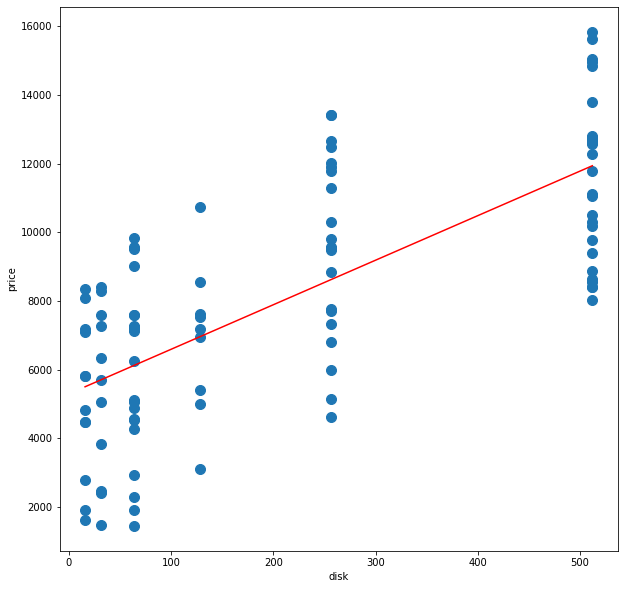

In [12]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes()
ax.scatter(start_df["disk"], start_df["price"], s=100)
ax.plot([X.disk.min(), X.disk.max()], [reg_prediction(X.disk.min()), reg_prediction(X.disk.max())], c="red")
ax.set_xlabel("disk")
ax.set_ylabel("price")
plt.show()

Задание 2: обучить модель классификации

In [13]:
### Тут нужно выгрузить в соответствующие переменные выбранные признаки ###
# X = 
# y =

X = start_df[['disk', 'year']]
y = start_df['os']

In [14]:
### Здесть следует запустить процесс обучения ###
### и продемонстрировать работосопосбность обученной модели ###

cl = DecisionTreeClassifier().fit(X, y)
print(export_text(cl))

|--- feature_0 <= 192.00
|   |--- class: Android
|--- feature_0 >  192.00
|   |--- class: iOS



In [15]:
cl.predict(X[1:2])[0], y[1]

('Android', 'Android')

Задание 3: обучить модель кластеризации

In [16]:
### Тут нужно выгрузить в соответствующие переменные выбранные признаки ###
# X = 

X = start_df[["disk", "year"]]

In [17]:
### Здесть следует запустить процесс обучения ###
### и продемонстрировать работосопосбность обученной модели ###

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


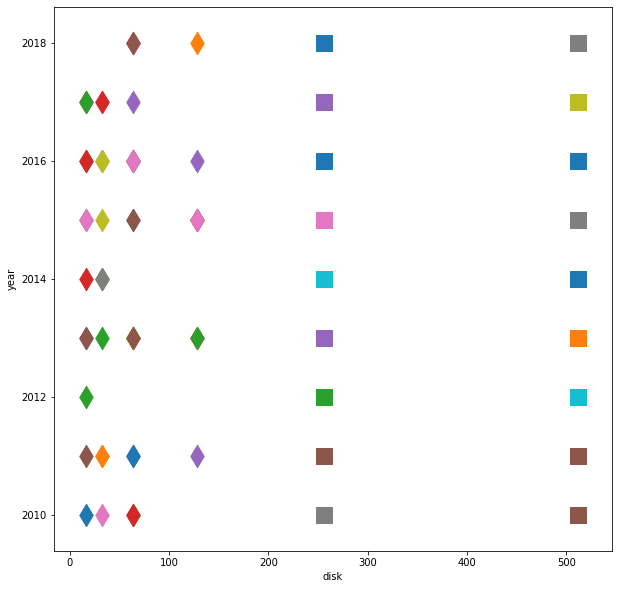

In [18]:
fig = plt.figure(figsize=(10, 10))
markers = {"iOS": "s", "Android": "d"}
for d1, d2, l in zip(start_df.disk, start_df.year, start_df.os):
    plt.scatter(d1, d2, s=250, marker=markers[l])
ax = plt.axes()    
ax.set_xlabel("disk")
ax.set_ylabel("year")
plt.show()

In [19]:
clust = KMeans(n_clusters=2).fit(X)
[c1, c2] = clust.cluster_centers_
print(clust.cluster_centers_)

[[ 113.72972973 2014.33783784]
 [ 512.         2013.88461538]]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


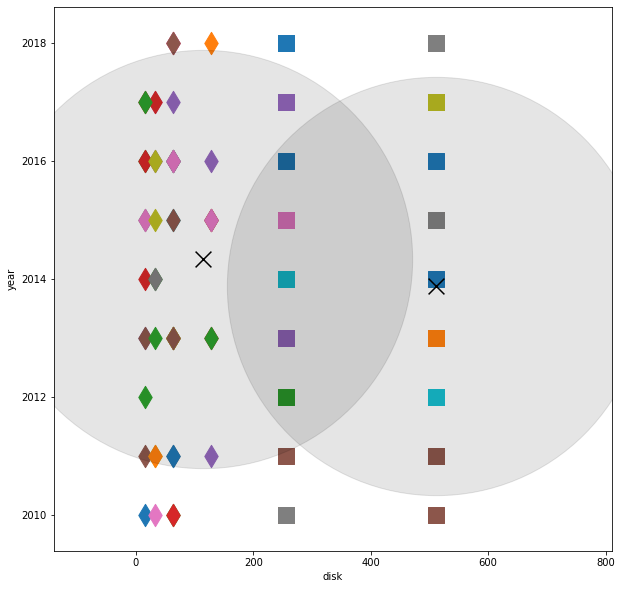

In [20]:
fig = plt.figure(figsize=(10, 10))
markers = {"iOS": "s", "Android": "d"}
for d1, d2, l in zip(start_df.disk, start_df.year, start_df.os):
    plt.scatter(d1, d2, s=250, marker=markers[l])

plt.scatter(c1[0], c1[1], s=250, marker="x", c="black")
plt.scatter(c1[0], c1[1], s=250 * 7e2, c="black", alpha=0.1)

plt.scatter(c2[0], c2[1], s=250, marker="x", c="black")
plt.scatter(c2[0], c2[1], s=250 * 7e2, c="black", alpha=0.1)

ax = plt.axes()    
ax.set_xlabel("disk")
ax.set_ylabel("year")

plt.show()